### Fashion MNIST Classification avec CNN 

***

#### Intro 

L'ensemble d'entraînement Fashion se compose de 70 000 images divisées en 60 000 échantillons d'entraînement et 10 000 échantillons de test. Chaque échantillon de données est une image en niveaux de gris de 28x28 pixels, associée à une étiquette appartenant à l'une des 10 classes suivantes :

Les 10 classes sont les suivantes : 0 => T-shirt/haut 1 => Pantalon 2 => Pull 3 => Robe 4 => Manteau 5 => Sandale 6 => Chemise 7 => Basket 8 => Sac 9 => Bottine

Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur, pour un total de 784 pixels au total. Chaque pixel a une seule valeur de pixel associée, indiquant la luminosité ou l'obscurité de ce pixel, les nombres plus élevés signifiant plus foncé. Cette valeur de pixel est un entier compris entre 0 et 255.

***

<span Style="color: blue"> **Etape 1:** </span> **Import des bibliothèques**

In [9]:
import numpy as np
import pandas as pd

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [12]:
import tensorflow as tf 
from tensorflow import keras 
from keras.datasets import fashion_mnist
from keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import models 
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, BatchNormalization, Flatten, Dropout


<span style="color:blue"> **Etape 2:** </span>  **Import des données**

In [13]:
(train, train_label), (test, test_label) = fashion_mnist.load_data()

<span Style="color:blue"> **Etape 3:** </span> **Visualisation des données**

In [63]:
print ('La forme des données d entraînement ', train.shape)
print ('La forme des étiquettes d entraînement', train_label.shape)
print ('La forme des données de test', test.shape)
print ('La forme des étiquettes de test ', test_label.shape)

La forme des données d entraînement  (60000, 28, 28)
La forme des étiquettes d entraînement (60000, 10)
La forme des données de test (10000, 28, 28)
La forme des étiquettes de test  (10000,)


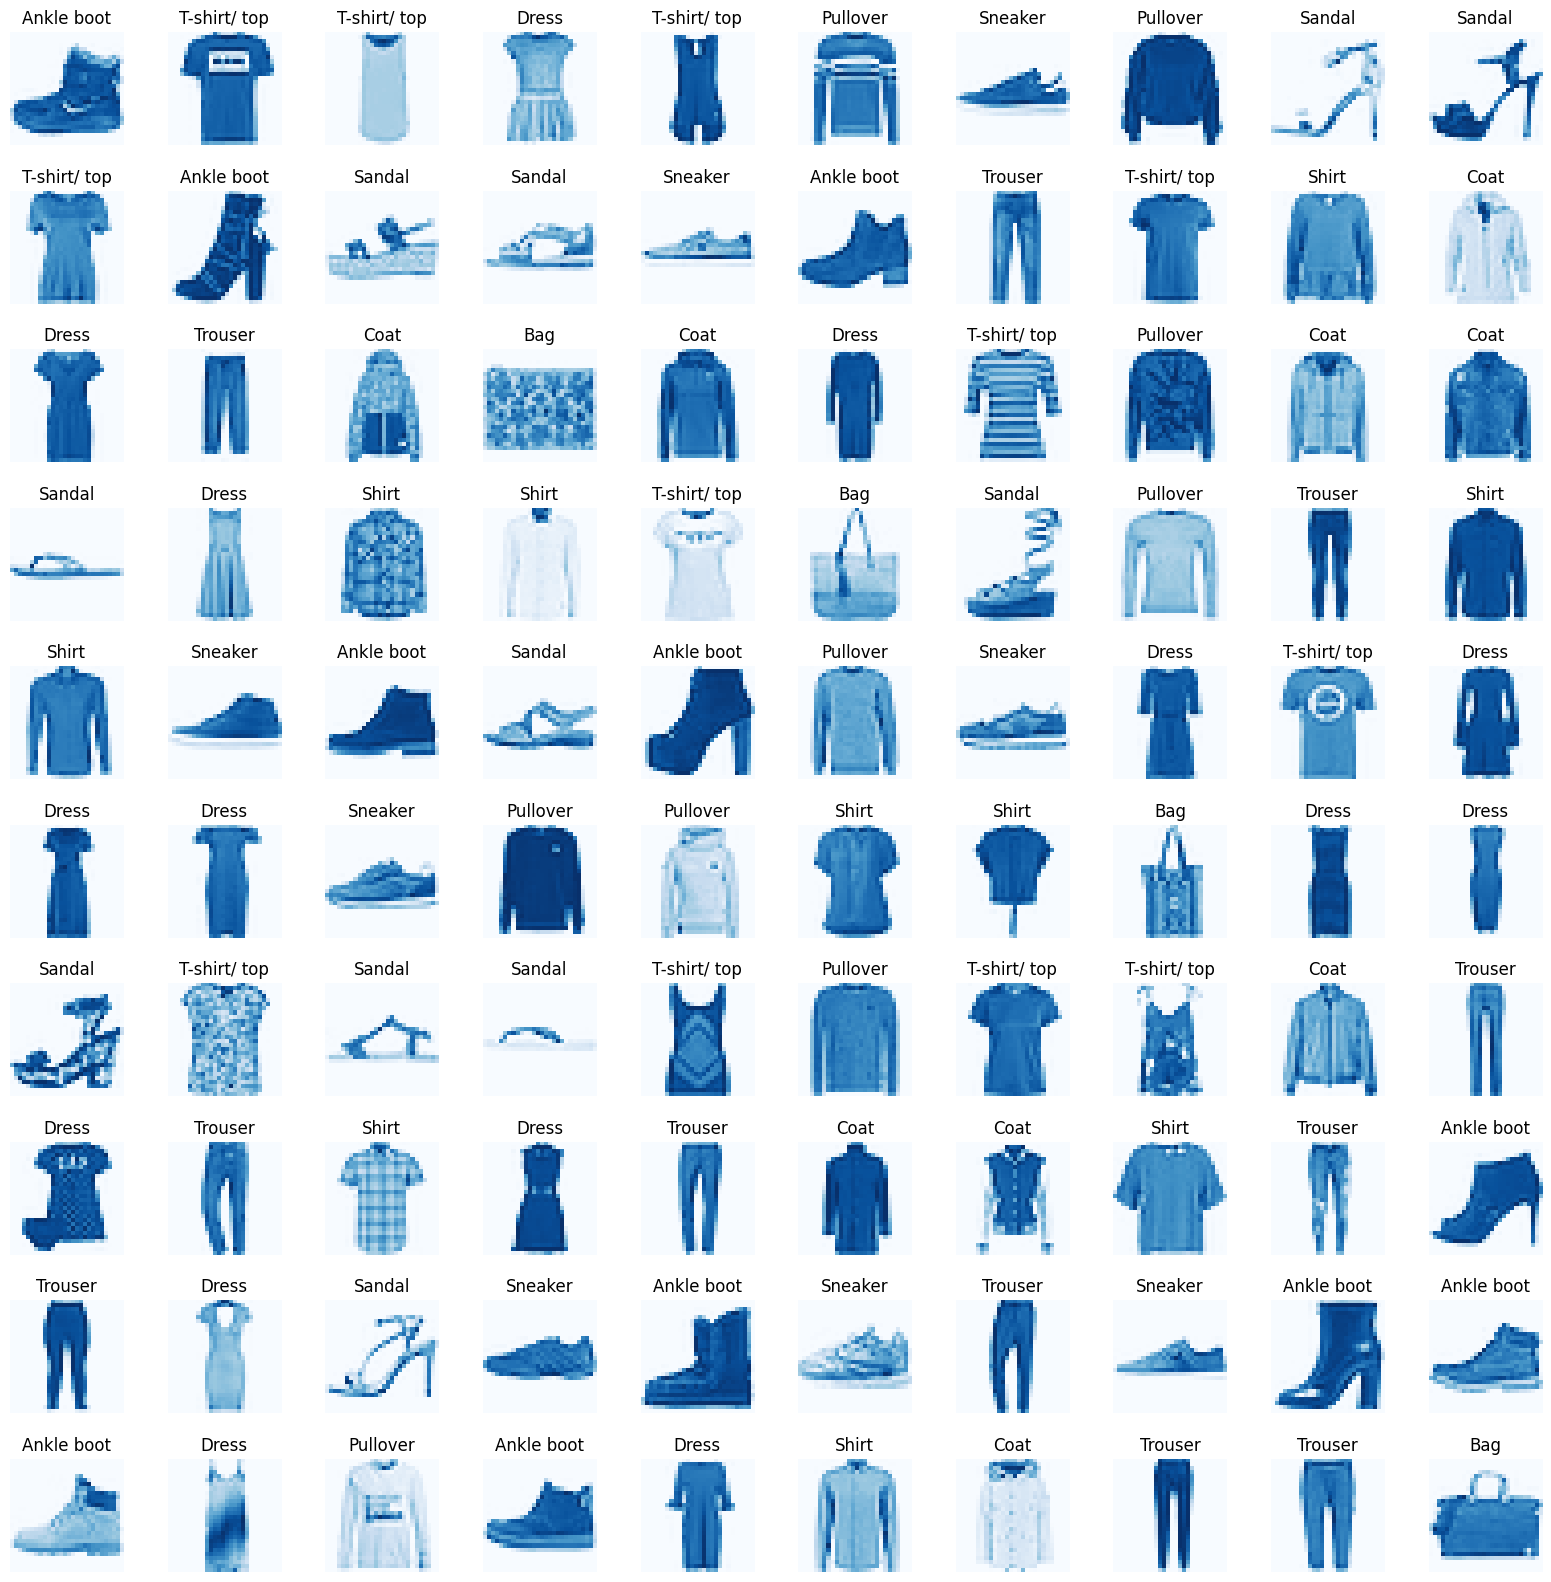

In [15]:
plt.figure(figsize = (20, 20)) 
plt.subplots_adjust (hspace = 0.4)

labels = ['T-shirt/ top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range (100):
    plt.subplot(10, 10, i+1)
    plt.imshow(train[i], cmap='Blues')
    plt.title(labels[int(train_label[i])], fontsize=12)
    plt.axis('off')

plt.show()

<span Style="font-family: secramento"> **La distribution des classes dans les deux datasets**  </span> 

<span Style="color: blue"> **1- Distribution des classes dans 'Training dataset'** </span>

C:\Users\Hp\AppData\Local\Temp\ipykernel_32280\3333924421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (data=uni, x=uni.index, y='Count', palette='Blues', width=0.5).set_title('Distribution des classes dans Train Dataset' , fontsize= 15)


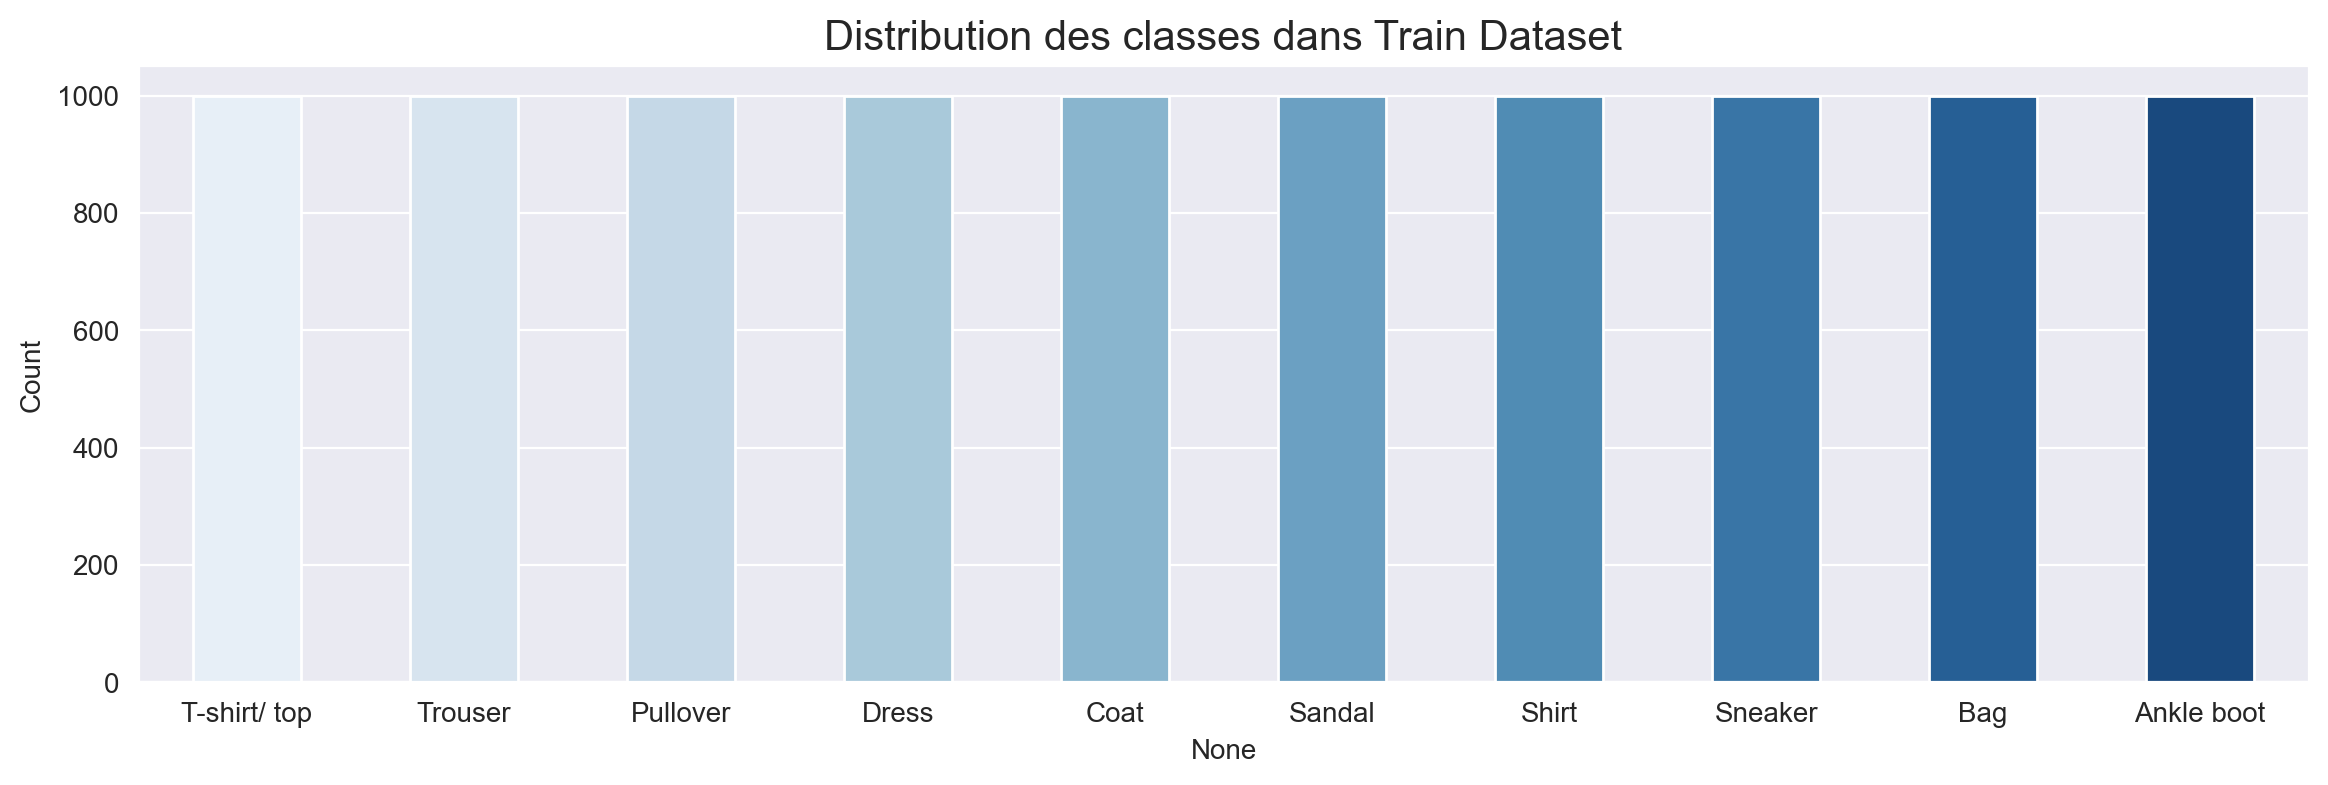

In [72]:
label, count = np.unique (test_label, return_counts=True)
uni= pd.DataFrame(data = count, index=labels, columns=['Count'])

plt.figure(figsize = (14,4), dpi= 200)
sns.barplot (data=uni, x=uni.index, y='Count', palette='Blues', width=0.5).set_title('Distribution des classes dans test Dataset' , fontsize= 15)
plt.show()

<span Style="color: blue"> **2- Distribution des classes dans 'Testing dataset'** </span>

C:\Users\Hp\AppData\Local\Temp\ipykernel_32280\215464608.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (data=uni, x=uni.index, y='Count', palette='Blues', width=0.5).set_title('Distribution des classes dans test Dataset' , fontsize= 15)


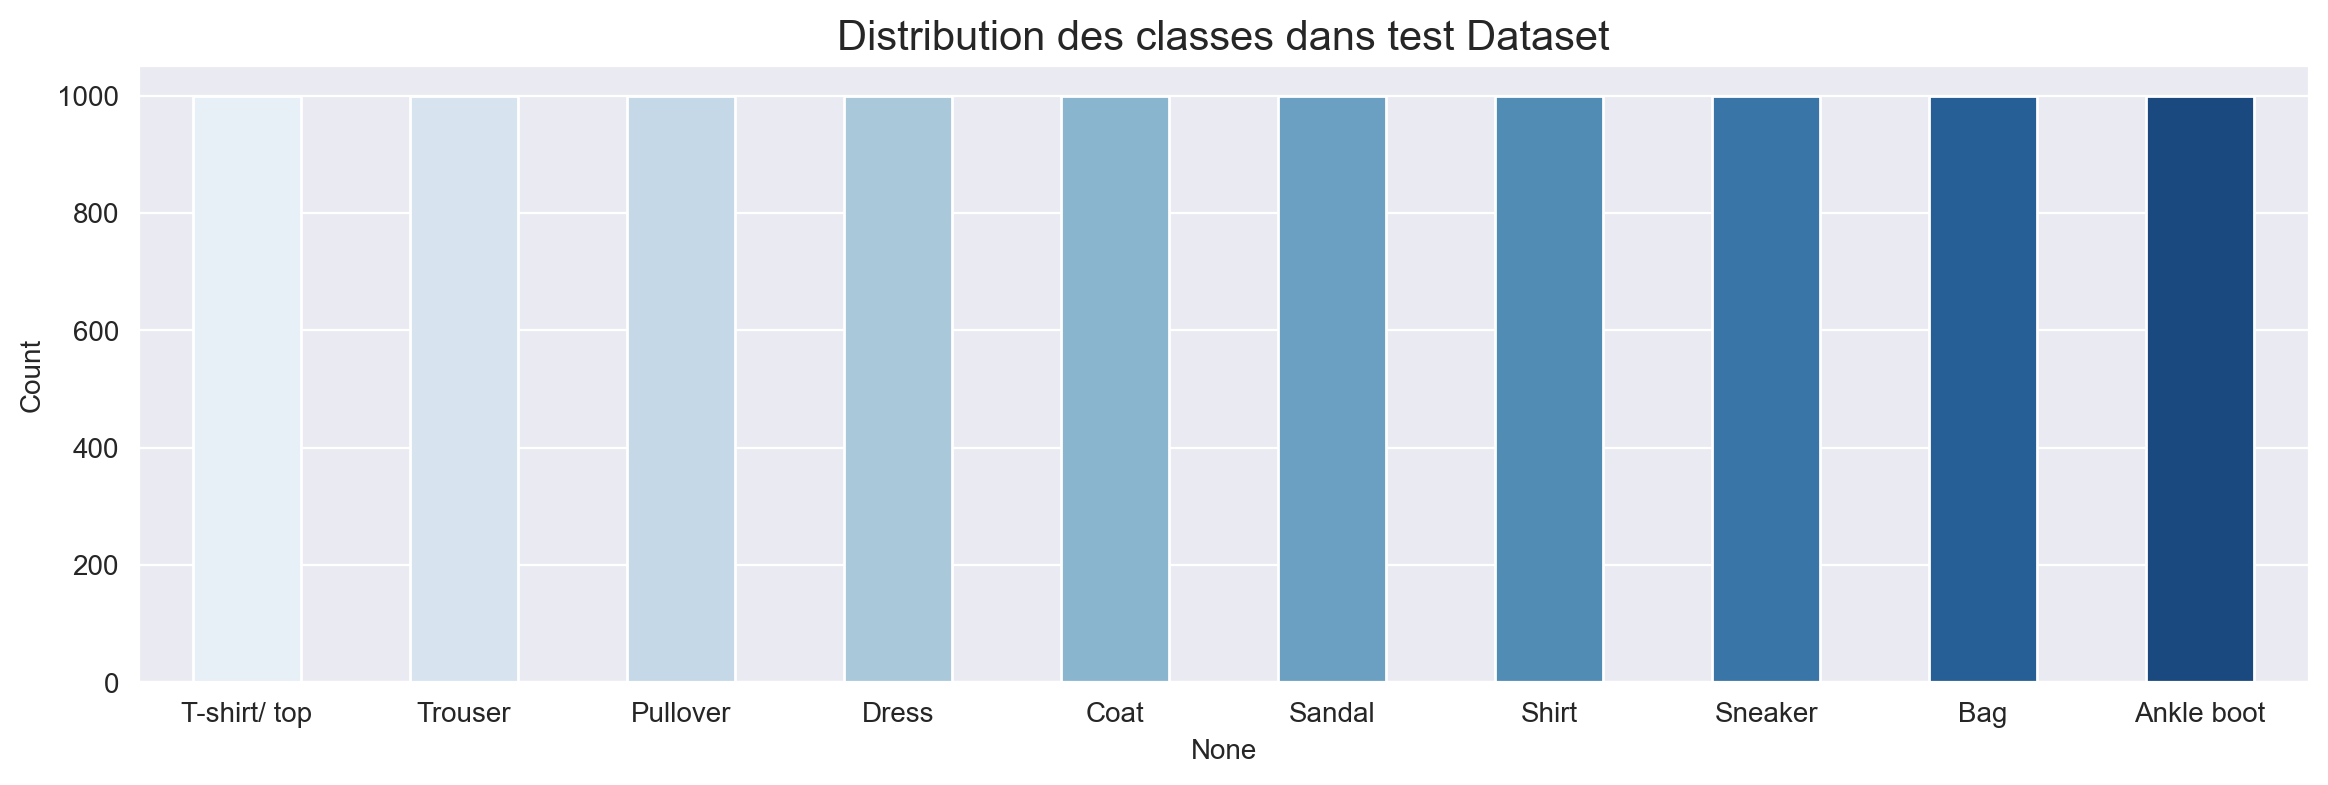

In [68]:
label, count = np.unique (test_label, return_counts=True)
uni= pd.DataFrame(data = count, index=labels, columns=['Count'])

plt.figure(figsize = (14,4), dpi= 200)
sns.barplot (data=uni, x=uni.index, y='Count', palette='Blues', width=0.5).set_title('Distribution des classes dans test Dataset' , fontsize= 15)
plt.show()

 ###### * On doit metter à l'échelle ces valeurs dans une plage de 0 à 1 avant de les fourninr au modèle de réseau neuronal. Pour ce faire, on va diviser les valeurs par 255. 
 * Il est important que l'ensemble d'entrainement et l'ensemble de test soient prétraités de la meme manière. 

In [18]:
def pre_process(data):
    return data/255

def to_cat(data):
    return to_categorical(data, num_classes =10)


In [73]:
train = pre_process(train)
test= pre_process(test)

print('La forme de train_label avant one hot encoding', train_label.shape)

train_label = to_cat(train_label)

print('La forme de  y_train après one hot encoding' , train_label.shape)

La forme de train_label avant one hot encoding (60000, 10)
La forme de  y_train après one hot encoding (60000, 10, 10)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(train, train_label, test_size=0.2, random_state=42)

print('le nombre des données dans train dataset est : ', X_train.shape[0])
print('le nombre des données dans test dataset est', X_test.shape[0])

le nombre des données dans train dataset est :  48000
le nombre des données dans test dataset est 12000


In [23]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
 # X_train
# X_test

<span Style="color: blue"> **Etape 3:** </span> **ENTRAÎNEMENT DU MODÈLE**

* La construction du réseau neuronal nécessite la configuration des couches du modèle, puis la compilation du modèle.

<span Style="color: brown">  ****1- Configuration des couches**** </span>

Le bloc de construction de base d'un réseau neuronal est la couche. Les couches extraient des représentations des données qui leur sont fournies. Espérons que ces représentations sont significatives pour le problème en cours.

La plupart de l'apprentissage profond consiste à enchaîner des couches simples. La plupart des couches, telles que **tf.keras.layers.Dense**, ont des paramètres qui sont appris lors de l'entraînement.

In [24]:
model = models.Sequential()

model.add(Conv2D(32,3,activation='relu',padding='same',input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


La première couche de ce réseau, ***keras.layers.Flatten***, transforme le format des images d'un tableau bidimensionnel (de 28 par 28 pixels) en un tableau unidimensionnel (de 28 * 28 = 784 pixels). On peut considérer cette couche comme déroulant les lignes de pixels dans l'image et les alignant. Cette couche n'a pas de paramètres à apprendre ; elle ne fait que reformater les données.

Après avoir aplati les pixels, le réseau se compose d'une séquence de deux couche***s keras.layers.Den***se. Ce sont des couches neuronales connectées de manière dense, ou entièrement connectées. La première couche Dense a 128 nœuds (ou neurones). La deuxième (et dernière) couche est une couche softmax à 10 nœuds qui renvoie un tableau de 10 scores de probabilité qui s'additionnent à 1. Chaque nœud contient un score qui indique la probabilité que l'image actuelle appartienne à l'une des 10 classes.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,092,970 (4.17 MB)

 Trainable params: 1,091,818 (4.16 MB)

 Non-trainable params: 1,152 (4.50 KB)

<span Style="color:brown"> **2- Compilation du moèle** </span>

Avant que le modèle ne soit prêt pour l'entraînement, il a besoin de quelques réglages supplémentaires. Ceux-ci sont ajoutés lors de l'étape de compilation du modèle :

* Fonction de perte (Loss function) — Cela mesure à quel point le modèle est précis pendant l'entraînement. Vous voulez minimiser cette fonction pour "diriger" le modèle dans la bonne direction.

* Optimiseur (Optimizer) — C'est ainsi que le modèle est mis à jour en fonction des données qu'il voit et de sa fonction de perte.
Métriques (Metrics) — Utilisées pour surveiller les étapes d'entraînement et de test. L'exemple suivant utilise la précision, la fraction des images correctement classées.

<span Style="color: brown"> **3- Entainement du modèle** </span>

Entraîner le modèle neuronal nécessite les étapes suivantes :

1- Alimenter le modèle avec les données d'entraînement. Dans cet exemple, les données d'entraînement se trouvent dans les tableaux X_train et y_train.

2- Le modèle apprend à associer les images et les étiquettes.

3- Vous demandez au modèle de faire des prédictions sur un ensemble de test — dans cet exemple, le tableau X_test. Vérifiez que les prédictions correspondent aux étiquettes du tableau y_test.

Pour commencer l'entraînement, appelons la méthode **model.fit** — ainsi parce qu'elle "ajuste" le modèle aux données d'entraînement :

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stoping= tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [27]:
fashion = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks= [early_stoping], verbose=0)
loss3, acc3 = model.evaluate(X_test, y_test, batch_size = 64, verbose = 0)

In [49]:
print ('The accuracy of the base model is :' , acc3*100)
print('The Loss of the base model is :', loss3)

The accuracy of the base model is : 92.67500042915344
The Loss of the base model is : 0.1958763301372528


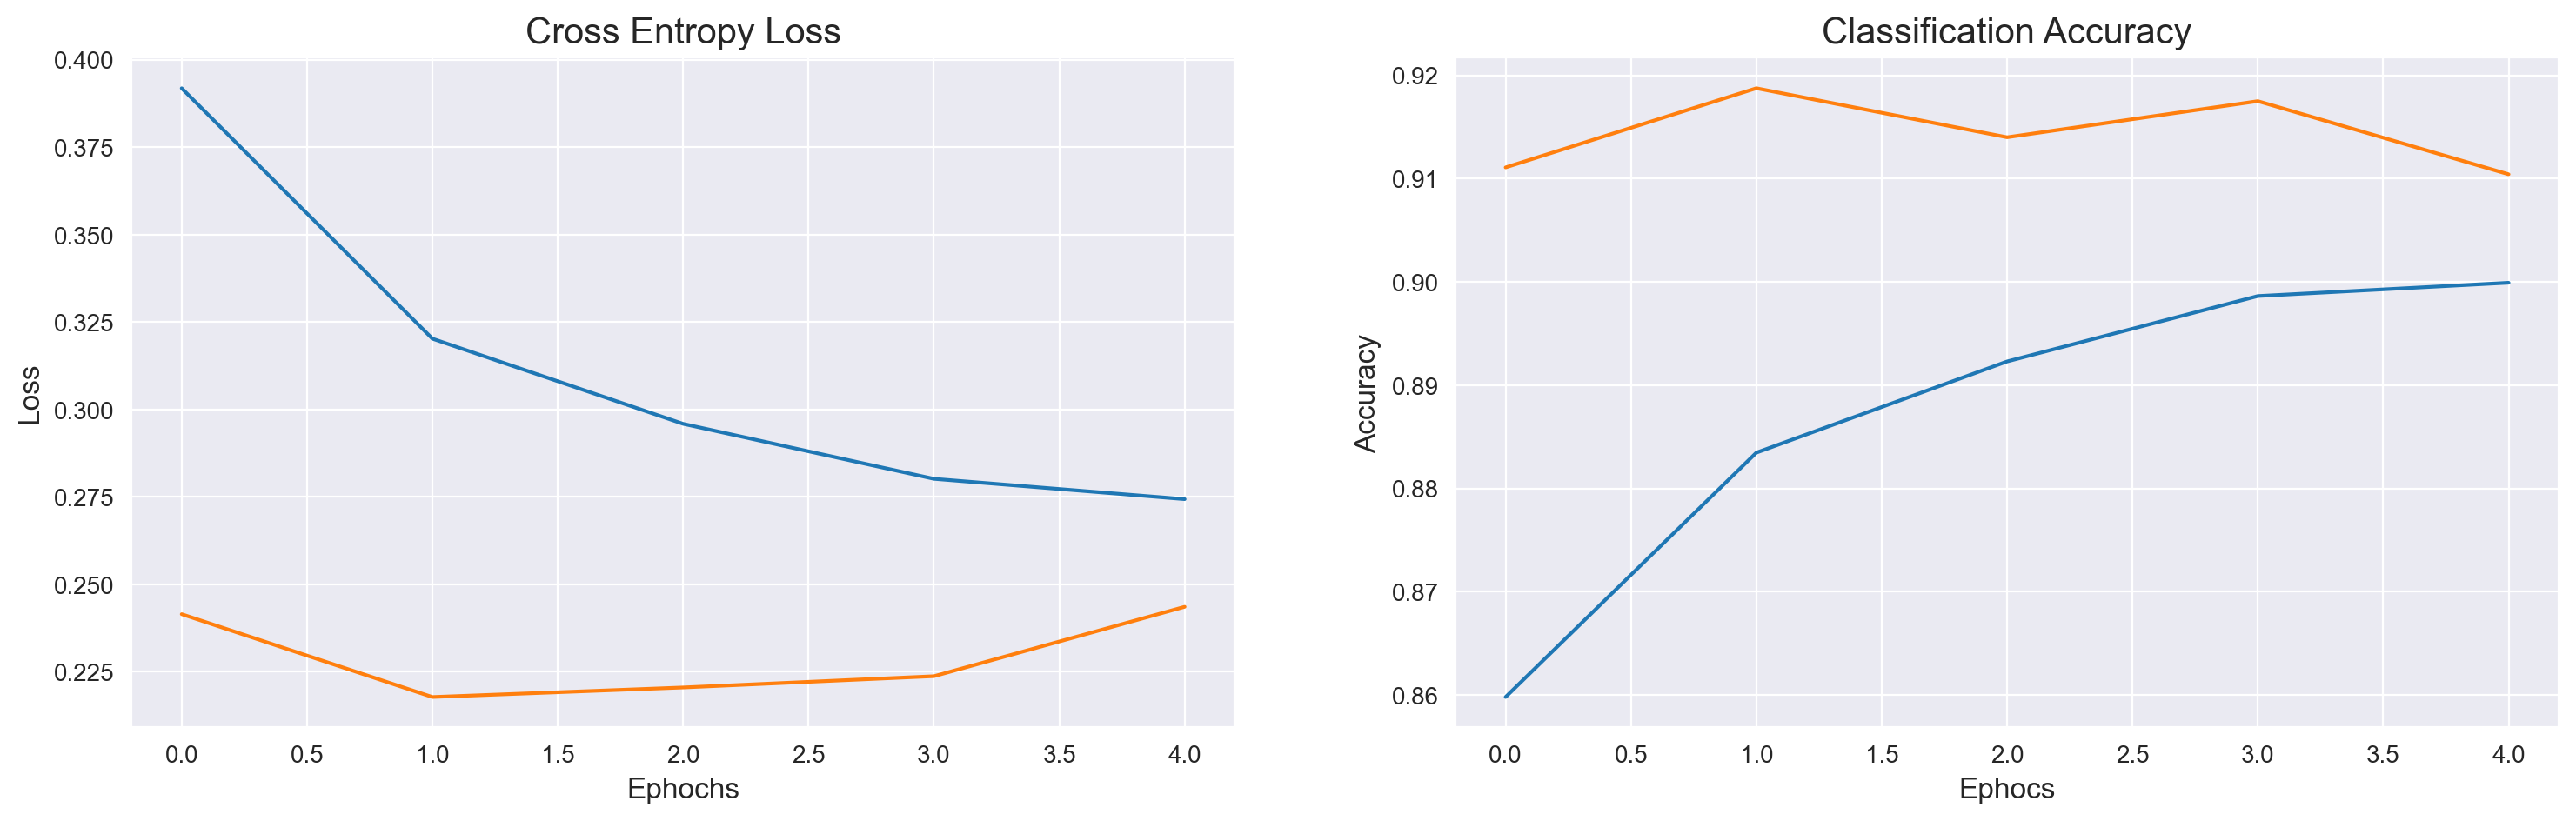

In [47]:
error = pd.DataFrame (fashion.history)

plt.figure(figsize = (18, 5) , dpi= 200) 
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Ephochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])


plt.subplot(122)
plt.title('Classification Accuracy', fontsize= 15)
plt.xlabel('Ephocs', fontsize = 12) 
plt.ylabel('Accuracy', fontsize= 12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])
plt.show()

In [37]:
datagen = ImageDataGenerator(#rotation_range=50,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1
                            )


train_gen = datagen.flow(X_train,y_train, batch_size=64)

fashion = model.fit(train_gen,
                    validation_data=(X_test,y_test),
                    epochs=50,
                   callbacks=[early_stoping])

Epoch 1/50


C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 312s 407ms/step - accuracy: 0.8337 - loss: 0.4898 - val_accuracy: 0.9111 - val_loss: 0.2415
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 258s 344ms/step - accuracy: 0.8804 - loss: 0.3232 - val_accuracy: 0.9187 - val_loss: 0.2178
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 214s 284ms/step - accuracy: 0.8897 - loss: 0.3023 - val_accuracy: 0.9140 - val_loss: 0.2205
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 194s 258ms/step - accuracy: 0.9009 - loss: 0.2750 - val_accuracy: 0.9175 - val_loss: 0.2237
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 123s 164ms/step - accuracy: 0.8982 - loss: 0.2778 - val_accuracy: 0.9104 - val_loss: 0.2436


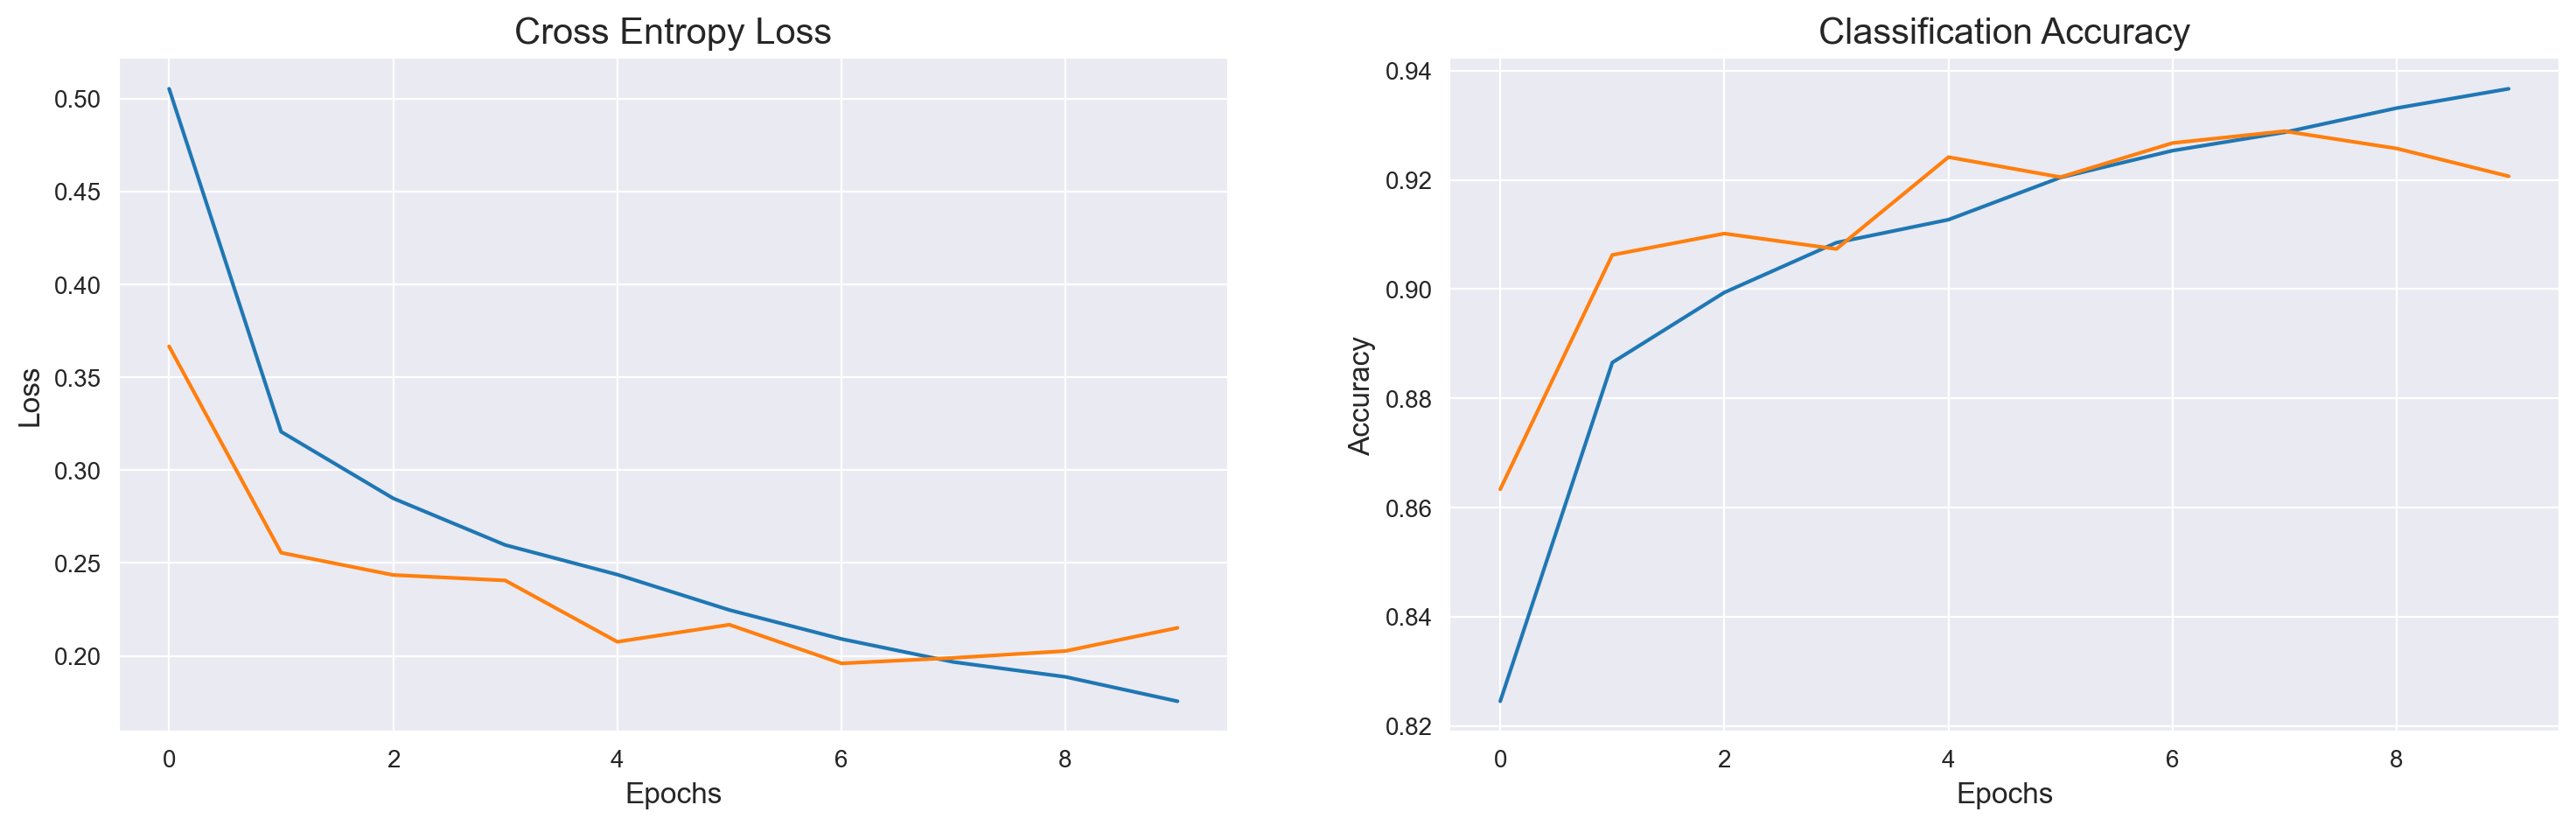

In [38]:
plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [39]:
y_pred= model.predict(test)
y_pred= np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step


In [40]:
print(classification_report(test_label,y_pred,target_names=labels))

              precision    recall  f1-score   support

T-shirt/ top       0.86      0.87      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.91      0.87      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.91      0.77      0.83      1000
      Sandal       0.94      0.99      0.97      1000
       Shirt       0.72      0.77      0.74      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



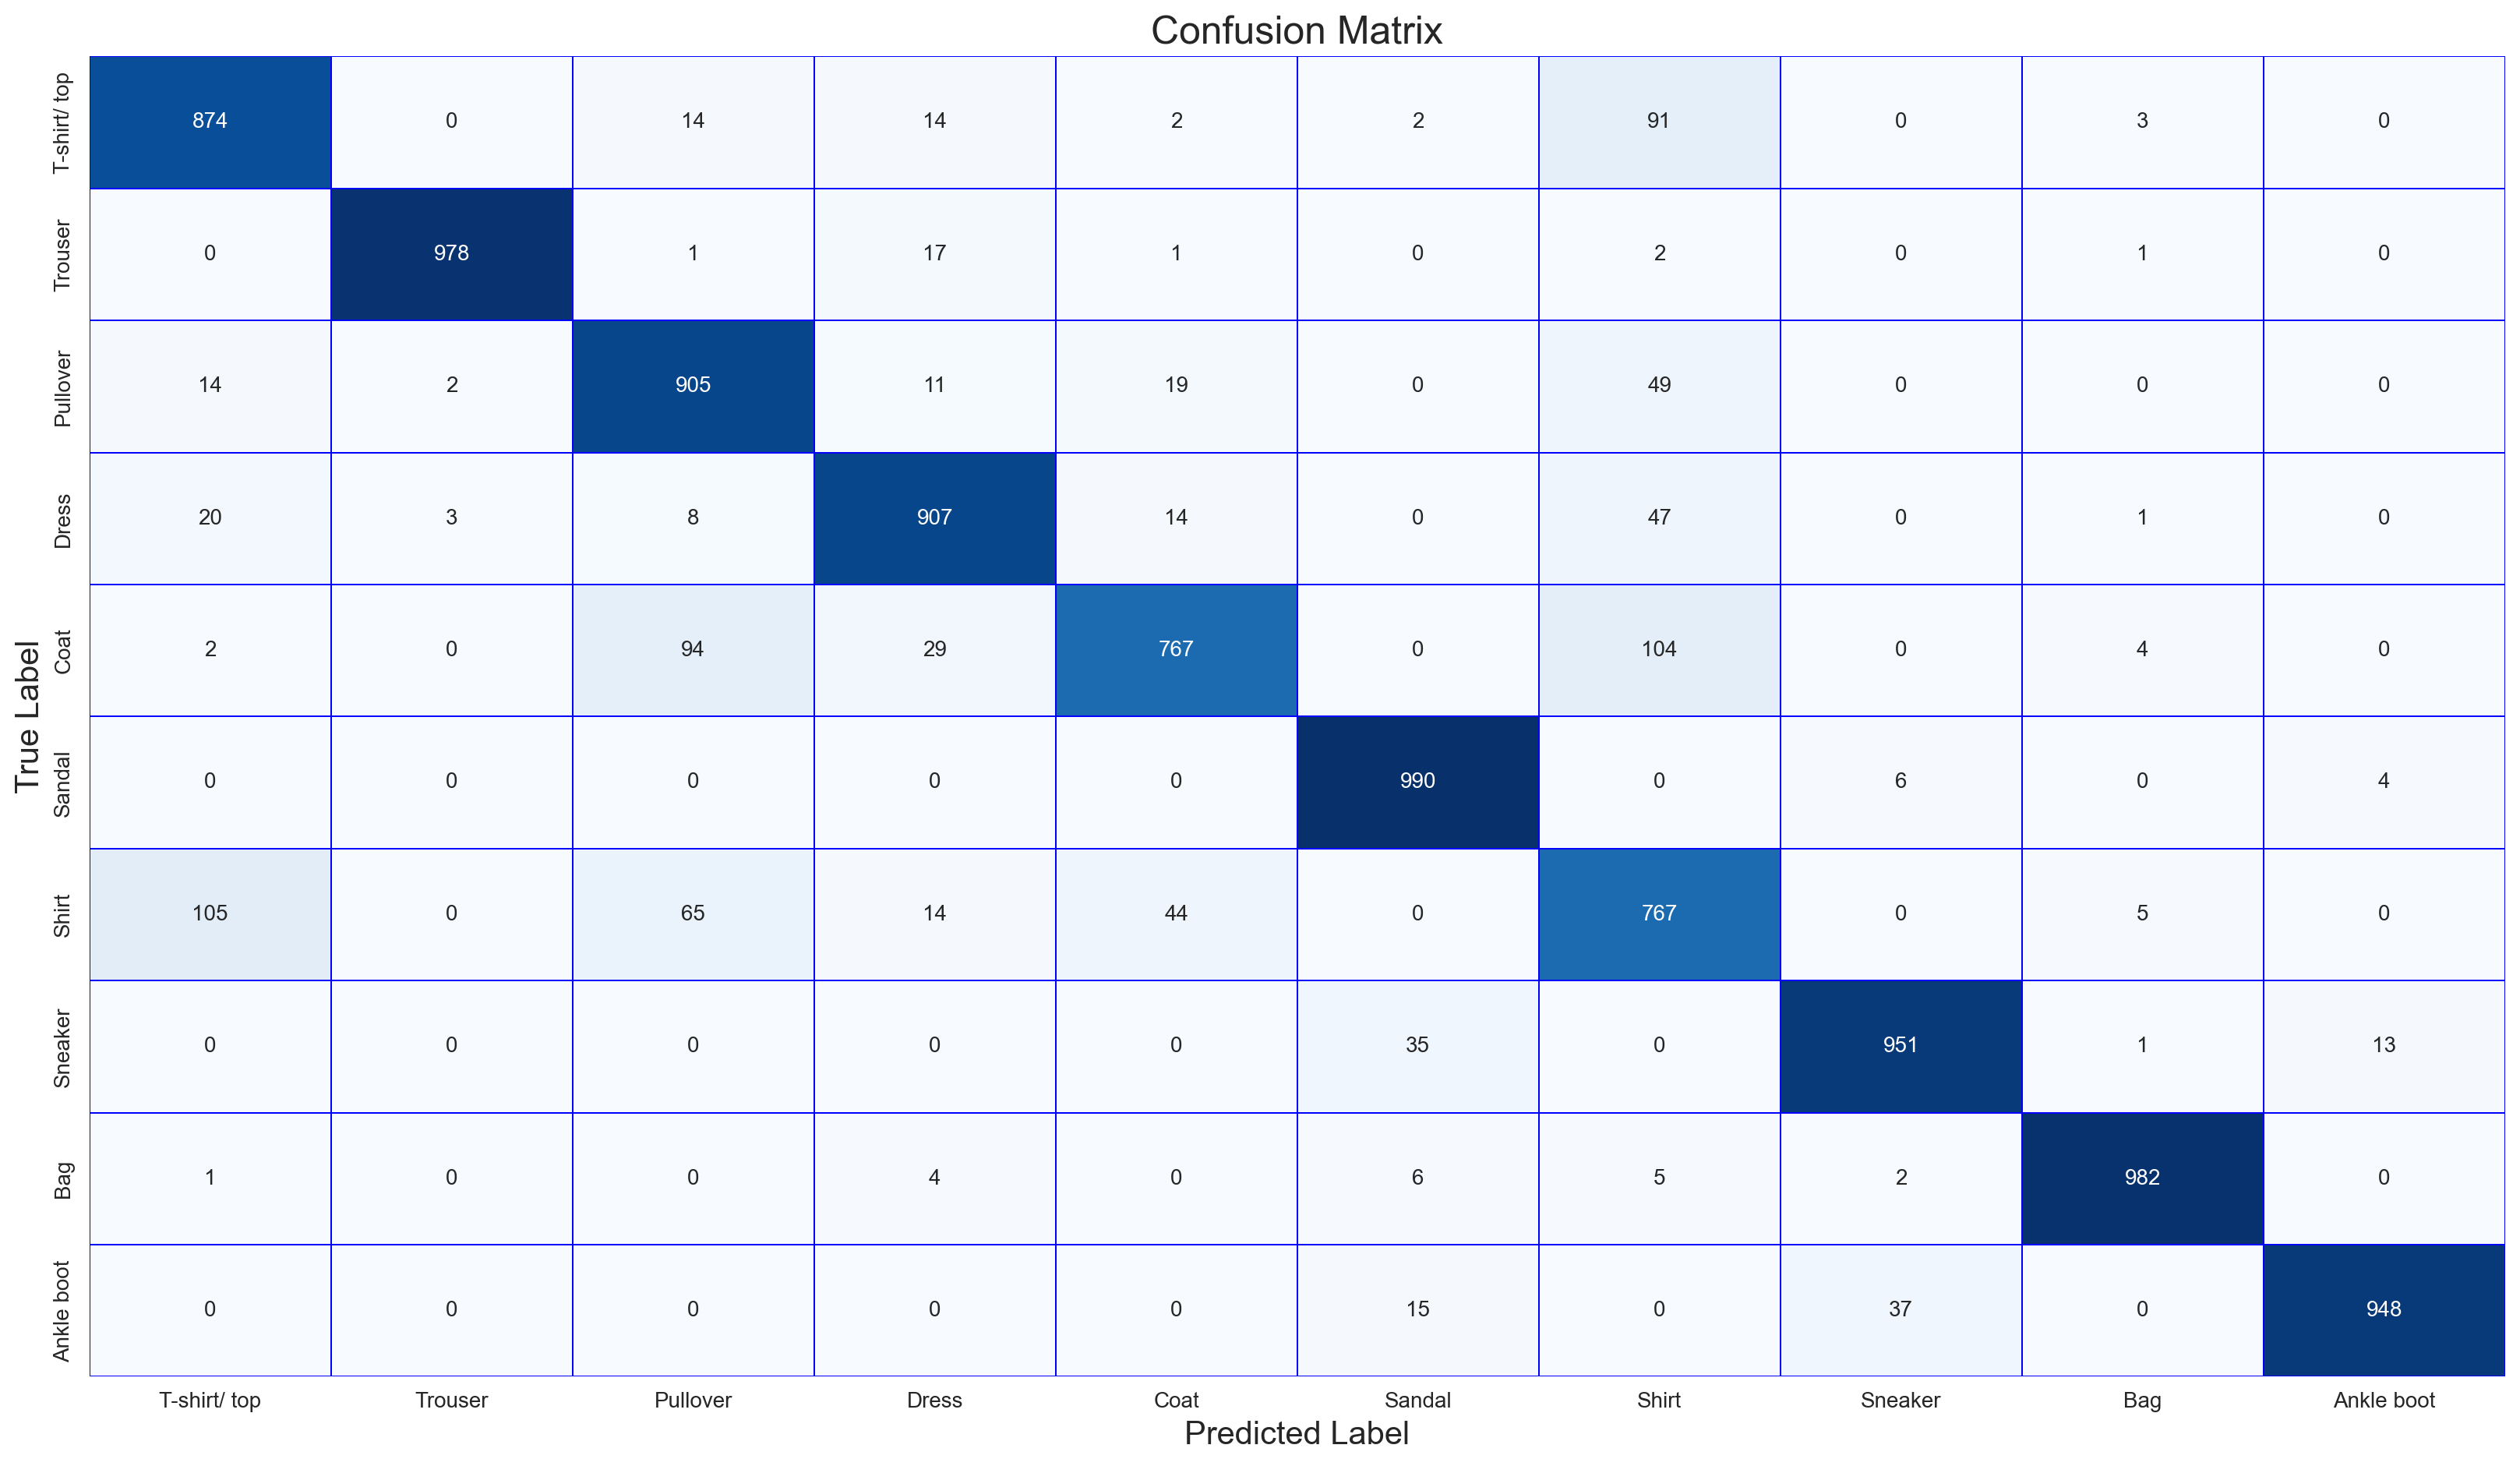

In [56]:
confusion_mtx = confusion_matrix(test_label,y_pred) 

f,ax = plt.subplots(figsize = (20,11),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "Blues", linecolor="Blue", fmt='.0f', ax=ax,cbar=False,xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label",fontsize=15)
plt.ylabel("True Label",fontsize=15)
plt.title("Confusion Matrix",fontsize=18)
plt.show()

In [42]:
p = y_pred[:10000]
y = test_label[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9069
Incorrect predicted classes: 931


In [55]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(20,10),dpi=200)

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[test_label[indx]],labels[y_pred[indx]]))
    plt.show()
    plt.tight_layout()

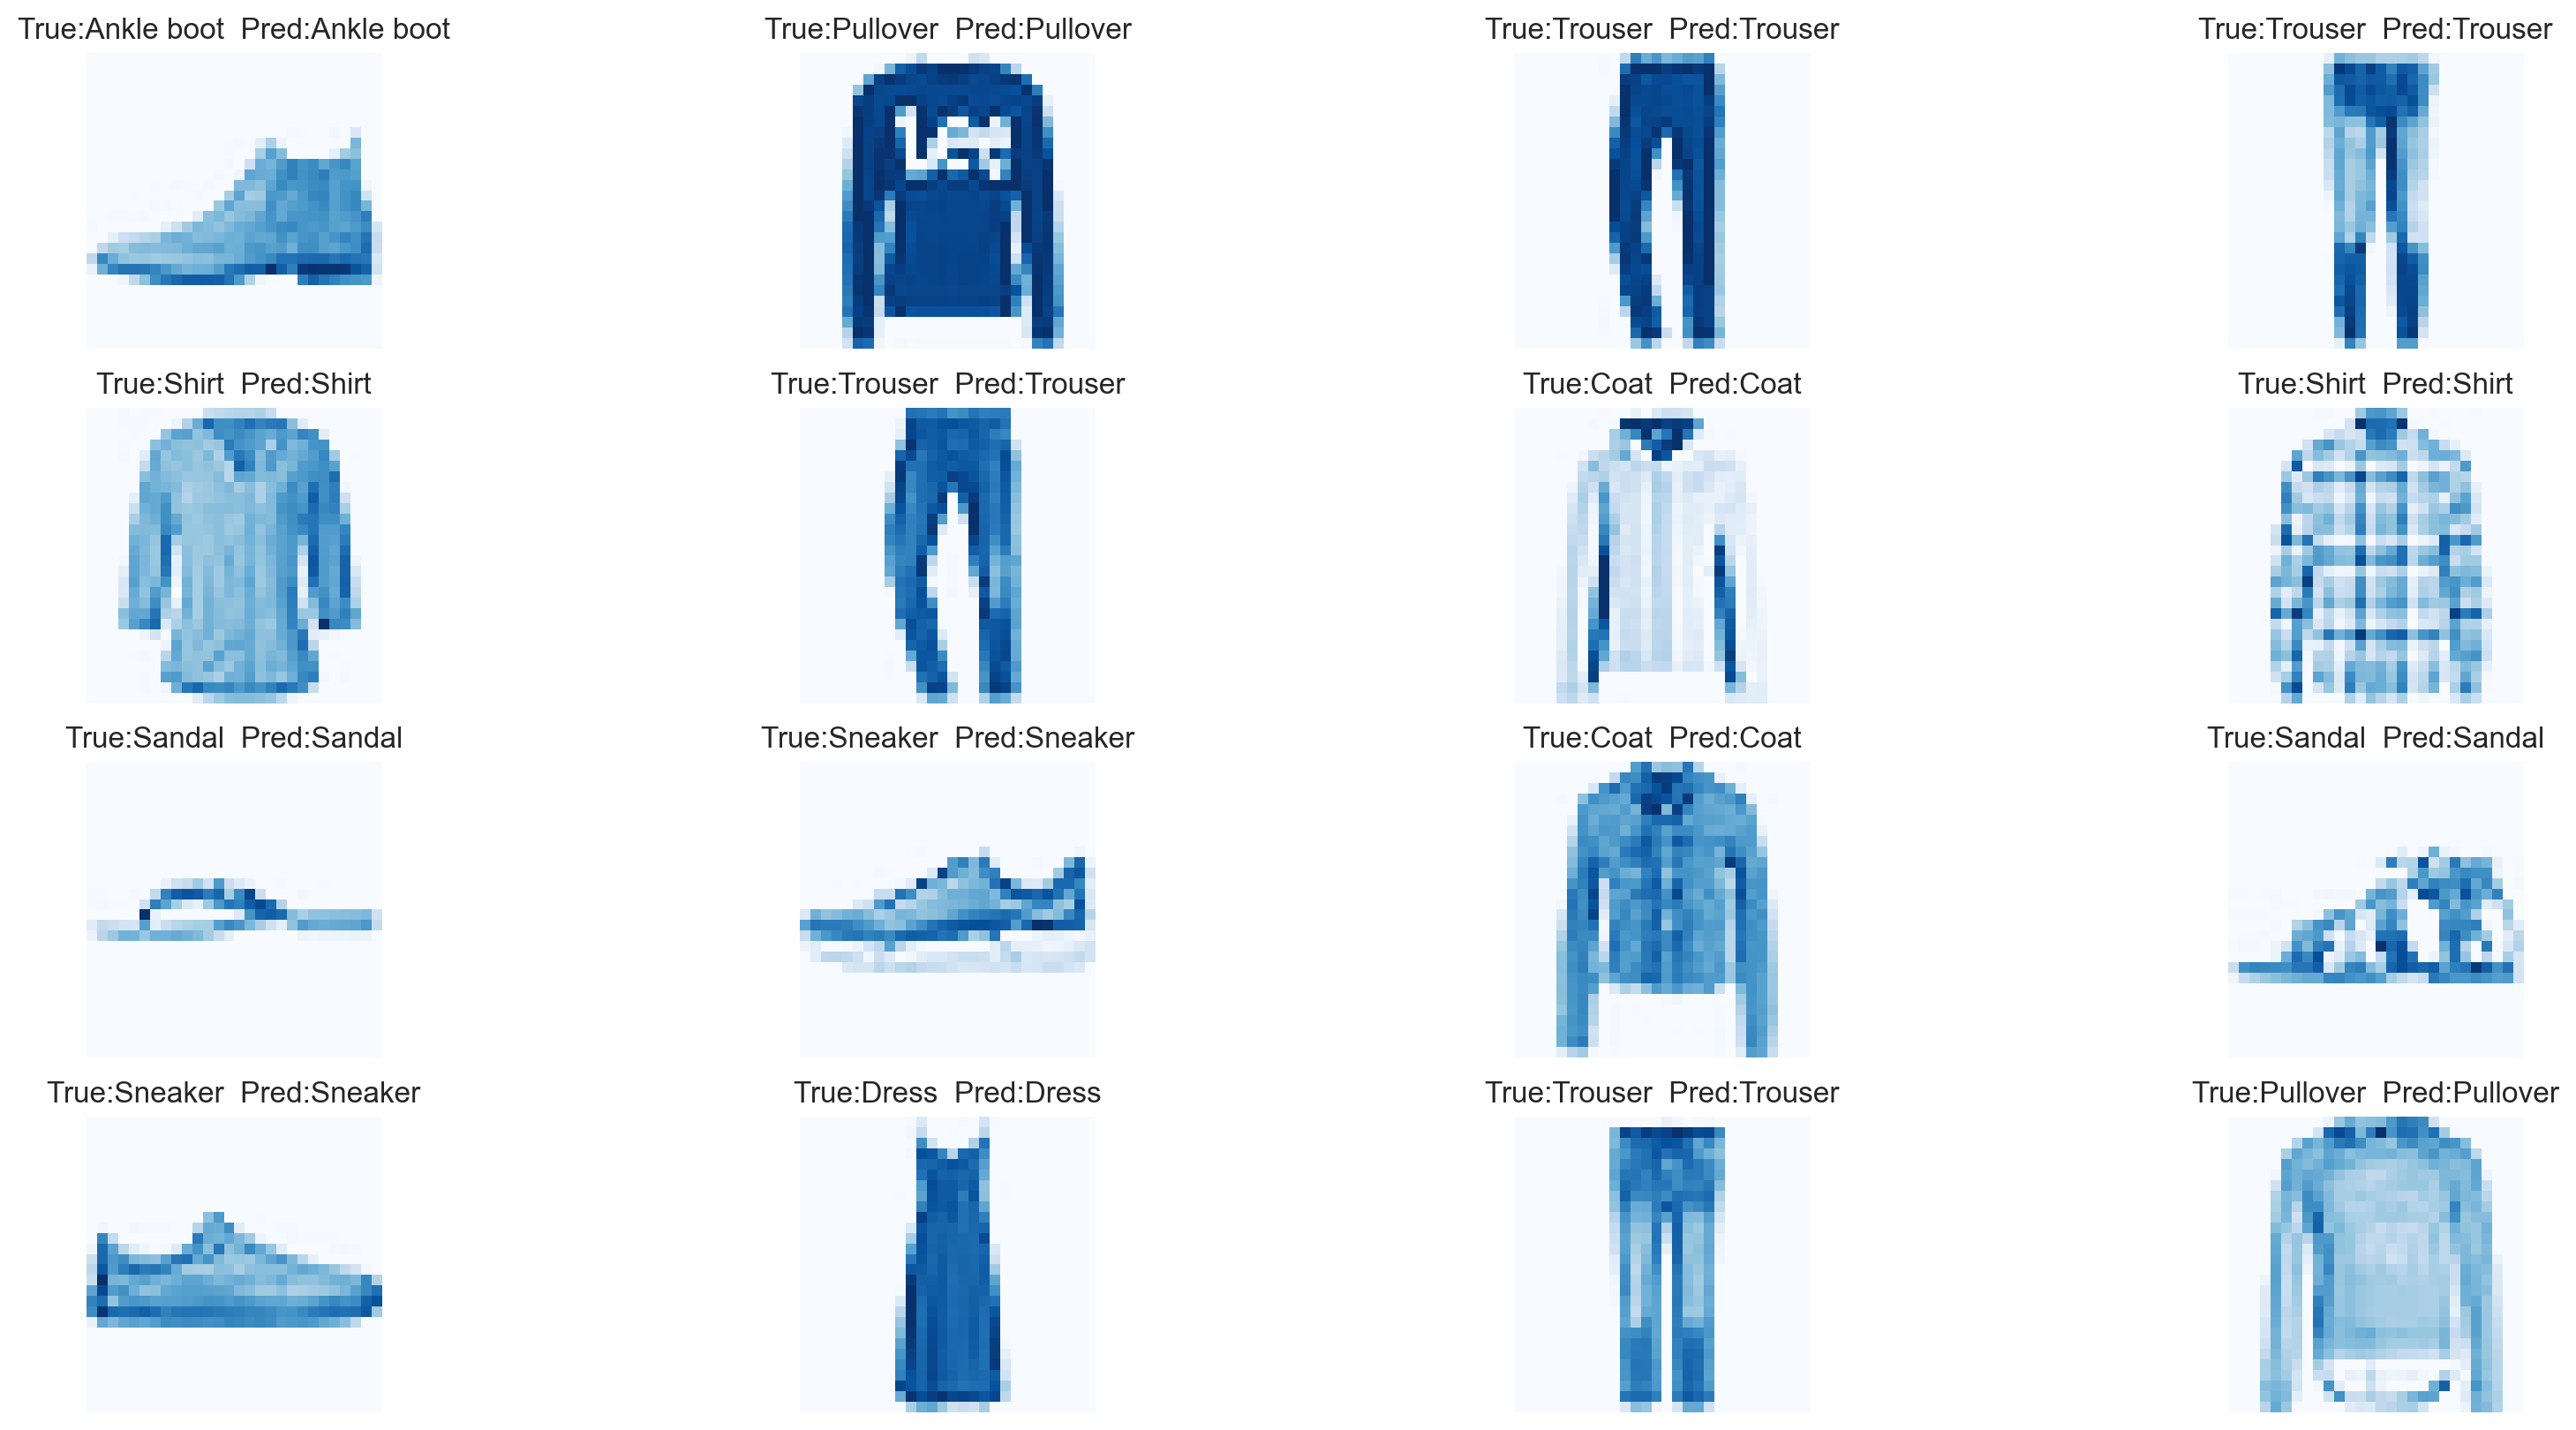

<Figure size 640x480 with 0 Axes>

In [57]:
plot_images(correct, "Blues")

In [ ]:
plot_images(incorrect, "Reds")

In [51]:
model.save('modele_cnn.h5')